In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
nfl = pd.read_csv('nfl.csv')
nfl.head()

,3d%,3d%_allowed,TOP,date,first_downs,first_downs_allowed,ha,margin,opp,pass_yards,...,rush_yards,rush_yards_allowed,sacked,sacks,takeaways,team,total_points,total_yards,total_yards_allowed,turnovers
0,0.307692,0.285714,28.350000,9/10/2009,18,19,away,-3,PIT,234,...,86,36,1,4,3,TEN,3,320,357,2
1,0.285714,0.307692,36.183333,9/10/2009,19,18,home,3,TEN,321,...,36,86,4,1,2,PIT,3,357,320,3
2,0.363636,0.400000,29.116667,9/13/2009,16,19,away,-12,ATL,163,...,96,68,4,2,0,MIA,26,259,281,4
3,0.400000,0.363636,30.883333,9/13/2009,19,16,home,12,MIA,213,...,68,96,2,4,4,ATL,26,281,259,0
4,0.250000,0.333333,26.550000,9/13/2009,10,16,away,5,CIN,227,...,75,86,3,3,2,DEN,19,302,307,0


In [3]:
nfl.columns

Index(['3d%', '3d%_allowed', 'TOP', 'date', 'first_downs',
       'first_downs_allowed', 'ha', 'margin', 'opp', 'pass_yards',
       'pass_yards_allowed', 'penalty_yards', 'plays', 'points',
       'points_allowed', 'result', 'rush_yards', 'rush_yards_allowed',
       'sacked', 'sacks', 'takeaways', 'team', 'total_points', 'total_yards',
       'total_yards_allowed', 'turnovers'],
      dtype='object')

In [4]:
# Assign X and y

X = nfl[["rush_yards"]]
y = nfl["points"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4806, 1) (4806, 1)


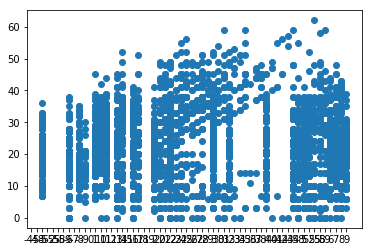

In [5]:
plt.scatter(X, y)

In [6]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Fit the model to to our data
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,margin
2753,-27
3074,-7
2915,5
2304,13
1196,-21


In [9]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\Samsung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Samsung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


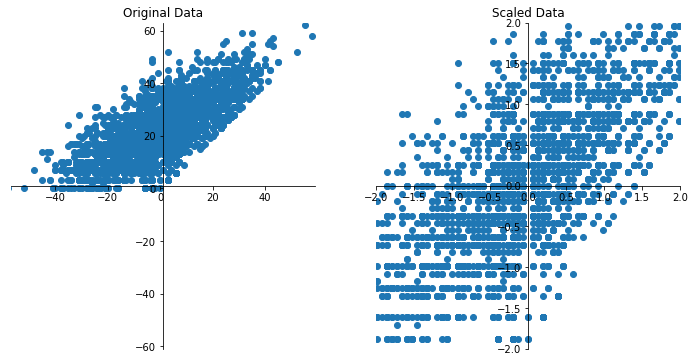

In [11]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["rush_yards"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["rush_yards"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

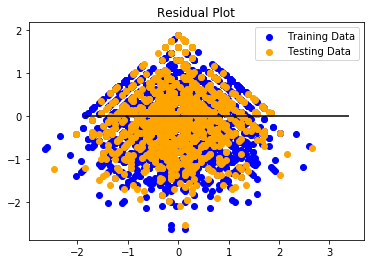

In [12]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5905089141975132, R2: 0.41647801292159015
